In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path_data_folder = Path(r"D:\coding\Jupyter_notebooks\ML\credit_risk_data")
path_train = path_data_folder / "application_train.csv"
path_test = path_data_folder / "application_test.csv"
path_col_description = path_data_folder / "HomeCredit_columns_description.csv"

In [4]:
data = pd.read_csv(path_train)

In [11]:
data.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
169664,296638,0,Cash loans,F,N,Y,0,155250.0,900000.0,46732.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
144888,268004,0,Cash loans,M,Y,N,1,315000.0,808650.0,22365.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
181883,310822,0,Cash loans,F,N,Y,1,211500.0,1190340.0,63418.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
73307,185001,0,Cash loans,M,Y,Y,2,171000.0,601470.0,30838.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
227496,363509,0,Cash loans,F,N,Y,2,112500.0,675000.0,21775.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print(data.dtypes.to_string())

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
data[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,134133.000000,3.068510e+05,246546.000000
mean,0.502130,5.143927e-01,0.510853
std,0.211062,1.910602e-01,0.194844
min,0.014568,8.173617e-08,0.000527
25%,0.334007,3.924574e-01,0.370650
50%,0.505998,5.659614e-01,0.535276
75%,0.675053,6.636171e-01,0.669057
max,0.962693,8.549997e-01,0.896010


In [8]:
print(data.isnull().sum().to_string())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
unnecessary_columns = """SK_ID_CURR
NAME_TYPE_SUITE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REGION_RATING_CLIENT
DAYS_LAST_PHONE_CHANGE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_PHONE
FLAG_EMAIL
FLAG_CONT_MOBILE""".split('\n')
# unnecessary_columns.sort(key=lambda col: data.columns.get_loc(col))

In [13]:
data.drop(columns=unnecessary_columns, inplace=True)

In [12]:
data.drop(columns=["FLAG_CONT_MOBILE"], inplace=True)

KeyError: "['FLAG_CONT_MOBILE'] not found in axis"

In [13]:
feat_documents_state = [i for i in data.columns if i.startswith("FLAG_DOCUMENT_")]
data.drop(columns=feat_documents_state, inplace=True)

In [14]:
# combine number of enquiries into one column
requests_columns = """AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR""".split('\n')

new_requests_col = "AMT_REQ_CREDIT_BUREAU"

data["AMT_REQ_CREDIT_BUREAU"] = np.sum(data[requests_columns], axis=1)
data.drop(columns=requests_columns, inplace=True)

In [15]:
# transform car age to categorical column
data["FLAG_OWN_CAR"] = data["OWN_CAR_AGE"].isnull()
data.drop(columns=["OWN_CAR_AGE"], inplace=True)

In [16]:
feat_categorical = {
    "TARGET",
    "NAME_CONTRACT_TYPE", 
    "CODE_GENDER", 
    "FLAG_OWN_CAR", 
    "FLAG_OWN_REALTY", 
    "NAME_INCOME_TYPE", 
    "NAME_EDUCATION_TYPE", 
    "NAME_FAMILY_STATUS", 
    "NAME_HOUSING_TYPE",
    "OCCUPATION_TYPE",
    "REGION_RATING_CLIENT_W_CITY",
    "REG_REGION_NOT_LIVE_REGION",
    "REG_REGION_NOT_WORK_REGION",
    "LIVE_REGION_NOT_WORK_REGION",
    "REG_CITY_NOT_LIVE_CITY",
    "REG_CITY_NOT_WORK_CITY",
    "LIVE_CITY_NOT_WORK_CITY",
    "ORGANIZATION_TYPE"
}

for f in feat_categorical:
    data[f] = data[f].astype("category")

In [17]:
print(data.dtypes.to_string())

TARGET                          category
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                    category
FLAG_OWN_REALTY                 category
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS              category
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE       float64
OCCUPATION_TYPE                 category
CNT_FAM_MEMBERS                  float64
REGION_RATING_CLIENT_W_CITY     category
REG_REGION_NOT_LIVE_REGION      category
REG_REGION_NOT_WORK_REGION      category
LIVE_REGION_NOT_WORK_REGION     category
REG_CITY_NOT_LIVE_CITY          category
REG_CITY_NOT_WORK_CITY          category
LIVE_CITY_NOT_WORK_CITY         category
ORGANIZATION_TYP

In [18]:
data["ORGANIZATION_TYPE"].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [19]:
data["REGION_RATING_CLIENT_W_CITY"].describe()

count     307511
unique         3
top            2
freq      229484
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

<AxesSubplot:xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='count'>

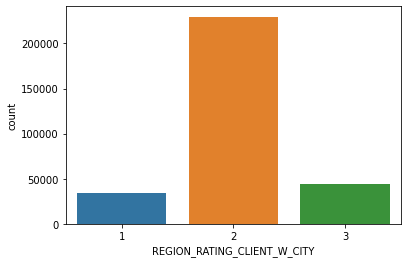

In [20]:
sns.countplot(x="REGION_RATING_CLIENT_W_CITY", data=data)

In [21]:
building_columns = """APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE""".split('\n')

In [22]:
# experiment with building info further
data["BUILDING_INFO_AVAILABLE"] = ~data[building_columns].isnull().any(axis=1)
data.drop(columns=building_columns, inplace=True)

REG_REGION_NOT_LIVE_REGION

REG_REGION_NOT_WORK_REGION

LIVE_REGION_NOT_WORK_REGION

REG_CITY_NOT_LIVE_CITY

REG_CITY_NOT_WORK_CITY

LIVE_CITY_NOT_WORK_CITY

think about decision tree for these columns

In [23]:
# flag_plots
feat_flags = sorted(list({i for i in data.columns if i.startswith("FLAG_")}))

In [24]:
feat_flags

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

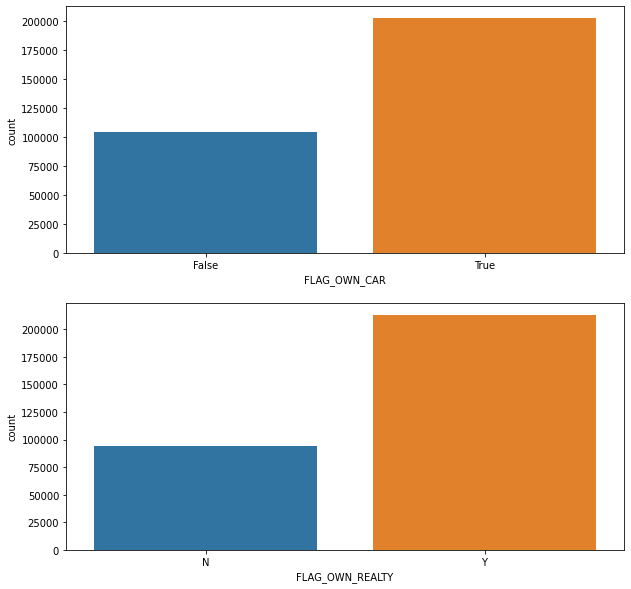

In [25]:
fig, axis = plt.subplots(ncols=1, nrows=len(feat_flags))

fig.set_size_inches(10, 5 * len(feat_flags))

for i in range(len(feat_flags)):
    sns.countplot(x = feat_flags[i], data=data, ax = axis[i])

<AxesSubplot:xlabel='TARGET', ylabel='count'>

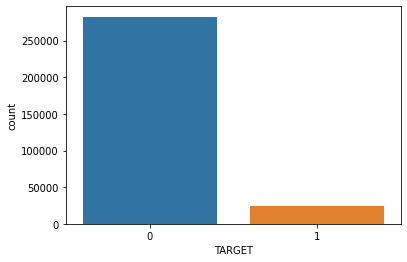

In [20]:
sns.countplot(x="TARGET", data=data)

In [26]:
def correlation_heatmap(input_data):
    corr_mtx = input_data.corr()
    mask = np.ones(corr_mtx.shape)
    mask[np.tril_indices_from(corr_mtx)] = False

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)

    sns.heatmap(corr_mtx, cmap="Reds", mask=mask, square=True, annot=True, ax=ax)

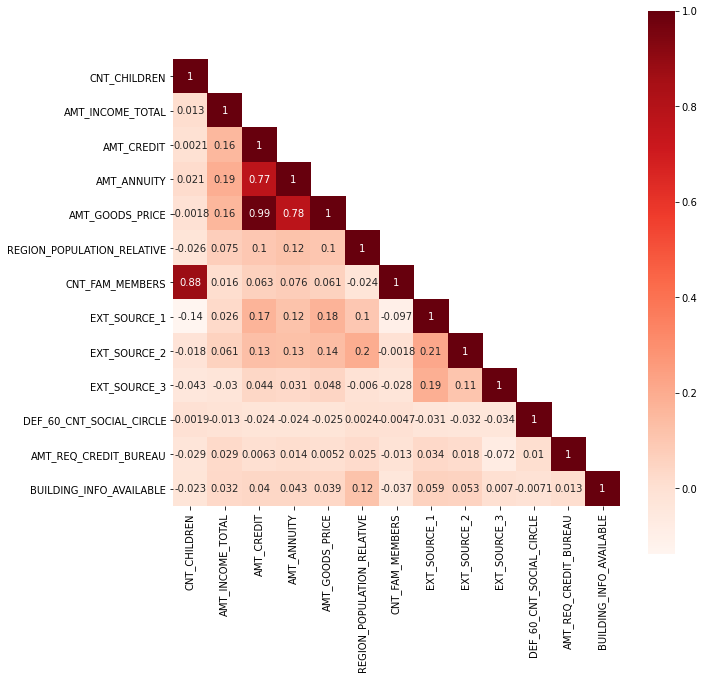

In [27]:
correlation_heatmap(data)

In [28]:
data.drop(columns=["CNT_CHILDREN", "AMT_GOODS_PRICE", "AMT_ANNUITY"], inplace=True)

Unknown features "external source scores"

In [29]:
feat_ext_sources = [col for col in data.columns if col.startswith("EXT_SOURCE_")]

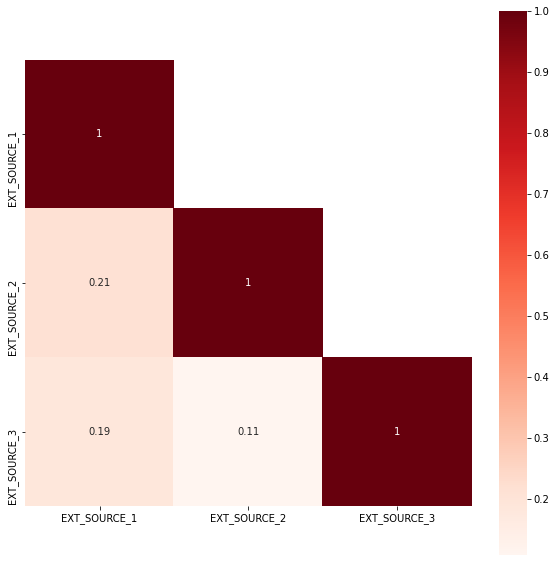

In [30]:
correlation_heatmap(data[feat_ext_sources])

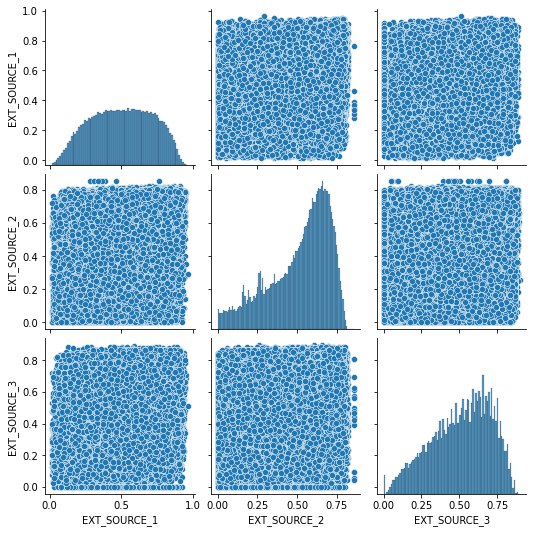

In [51]:
sns.pairplot(data[feat_ext_sources])

<AxesSubplot:xlabel='EXT_SOURCE_3', ylabel='EXT_SOURCE_2'>

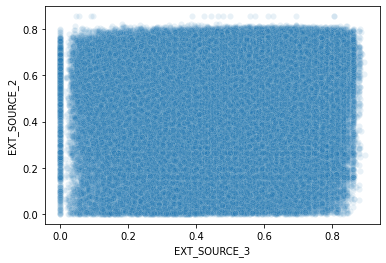

In [52]:
sns.scatterplot(x=feat_ext_sources[2], y=feat_ext_sources[1], data=data, alpha=0.1)

In [31]:
# do not specified purpose of these features. will try to train without them
data.drop(inplace=True, columns=feat_ext_sources)

In [32]:
feat_numerical = data.select_dtypes(include="number").columns
feat_numerical

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'CNT_FAM_MEMBERS', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU'],
      dtype='object')

In [34]:
len(data.columns)

25

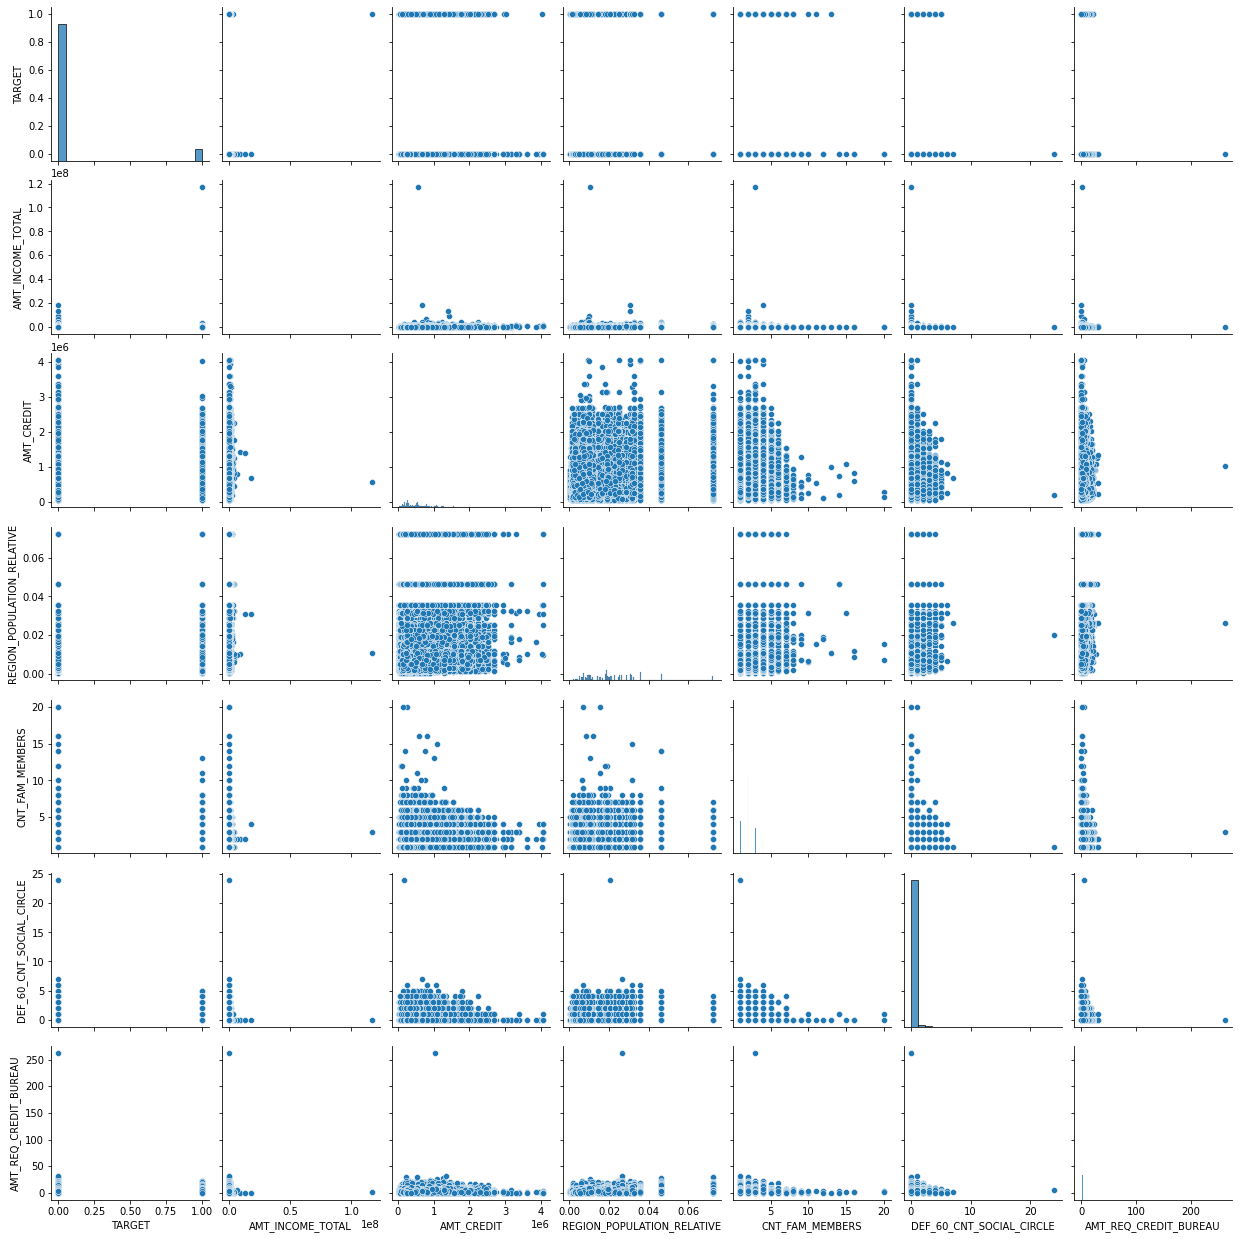

In [59]:
sns.pairplot(data[feat_numerical])

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE', ylabel='count'>

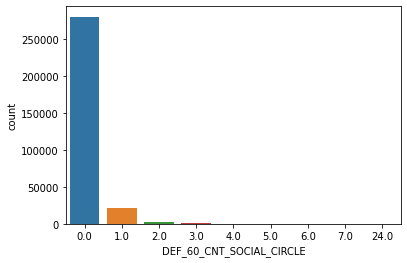

In [64]:
sns.countplot(x="DEF_60_CNT_SOCIAL_CIRCLE", data=data)